## 1-Import des librairies et chargement des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Charger le dataset “Breast Cancer” et le transformer en DataFrame
data = load_breast_cancer(as_frame=True)
df = data.frame

## 2- Aperçu rapide du DataFrame

In [2]:
# Afficher les 5 premières lignes
print("=== 5 premières lignes ===")
print(df.head(), "\n")

# Afficher le résumé des types et du nombre de valeurs non-nulles
print("=== Informations générales ===")
print(df.info(), "\n")

=== 5 premières lignes ===
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  w

## 3- Statistiques descriptives

In [3]:
# Calculer moyenne, écart-type, min, max, etc.
desc = df.describe().T

# Afficher le résultat formaté
print("=== Statistiques descriptives ===")
print(desc.to_string(), "\n")

=== Statistiques descriptives ===
                         count        mean         std         min         25%         50%          75%         max
mean radius              569.0   14.127292    3.524049    6.981000   11.700000   13.370000    15.780000    28.11000
mean texture             569.0   19.289649    4.301036    9.710000   16.170000   18.840000    21.800000    39.28000
mean perimeter           569.0   91.969033   24.298981   43.790000   75.170000   86.240000   104.100000   188.50000
mean area                569.0  654.889104  351.914129  143.500000  420.300000  551.100000   782.700000  2501.00000
mean smoothness          569.0    0.096360    0.014064    0.052630    0.086370    0.095870     0.105300     0.16340
mean compactness         569.0    0.104341    0.052813    0.019380    0.064920    0.092630     0.130400     0.34540
mean concavity           569.0    0.088799    0.079720    0.000000    0.029560    0.061540     0.130700     0.42680
mean concave points      569.0    0.04

## 4. Distribution de la variable cible

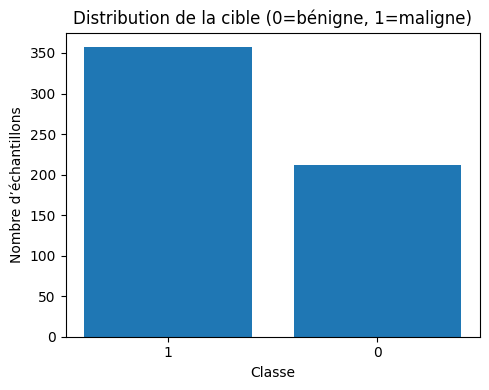

In [4]:
# Compter les classes 0 et 1
counts = df[data.target.name].value_counts()

# Tracer un bar chart
plt.figure(figsize=(5,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution de la cible (0=bénigne, 1=maligne)")
plt.xlabel("Classe")
plt.ylabel("Nombre d’échantillons")
plt.tight_layout()
plt.show()

## 5. Histogrammes de variables clés

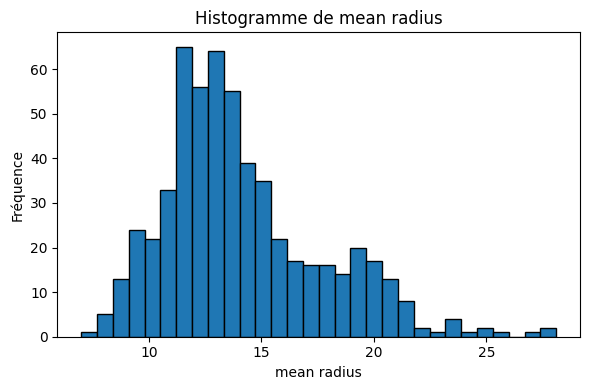

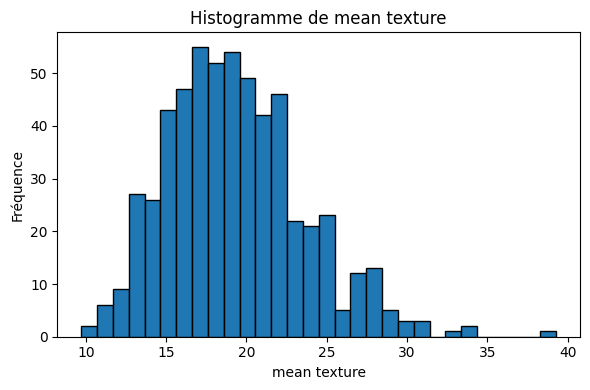

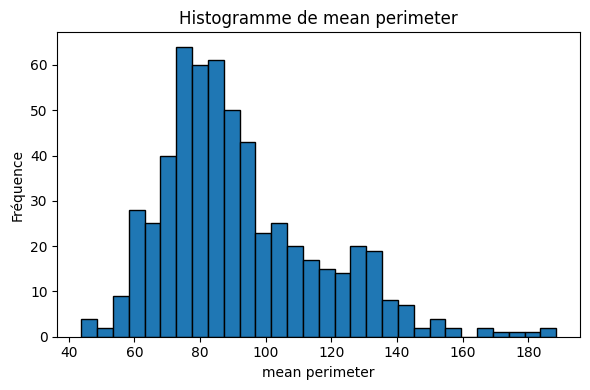

In [5]:
# Choix de quelques variables pour tracer leur histogramme
features = ['mean radius', 'mean texture', 'mean perimeter']

for feat in features:
    plt.figure(figsize=(6,4))
    plt.hist(df[feat], bins=30, edgecolor='black')
    plt.title(f"Histogramme de {feat}")
    plt.xlabel(feat)
    plt.ylabel("Fréquence")
    plt.tight_layout()
    plt.show()

## 6. Boxplots pour détecter les valeurs extrêmes

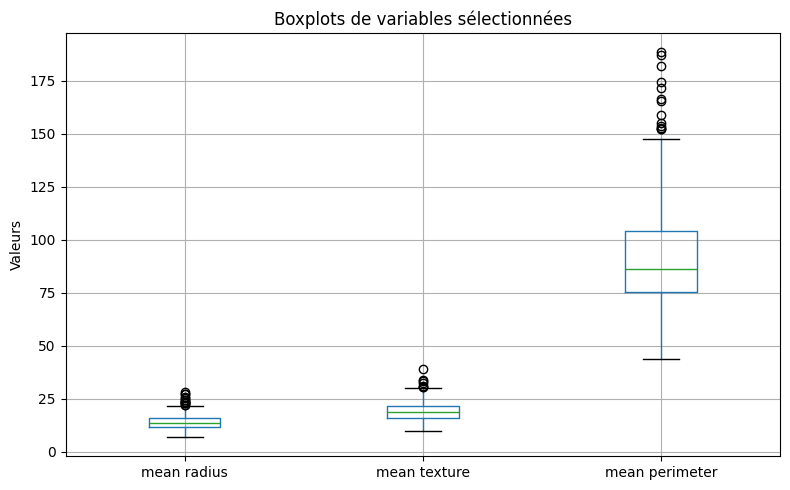

In [6]:
# Boxplot de la même sélection pour repérer outliers
plt.figure(figsize=(8,5))
df[features].boxplot()
plt.title("Boxplots de variables sélectionnées")
plt.ylabel("Valeurs")
plt.tight_layout()
plt.show()

## 7. Matrice de corrélation et visualisation

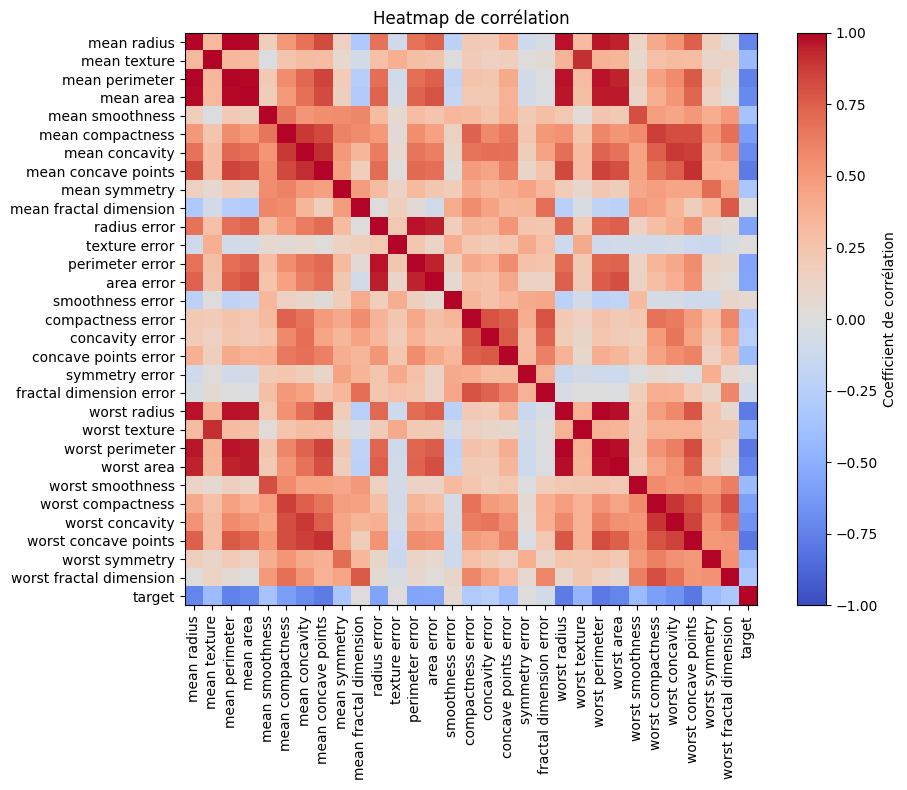

In [7]:
# Calcul de la corrélation de toutes les variables
corr = df.corr()

# Affichage en heatmap “manuelle”
plt.figure(figsize=(10,8))
plt.imshow(corr, vmin=-1, vmax=1, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Coefficient de corrélation")
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.title("Heatmap de corrélation")
plt.tight_layout()
plt.show()

# Entraînement de pipeline de régression logistique

## 1. Import des modules nécessaires

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## 2. Préparation des données (séparation X / y)

In [9]:
# On part du DataFrame 'df' obtenu précédemment
# X contient toutes les colonnes sauf la cible
X = df.drop(columns=[data.target.name])

# y contient uniquement la colonne cible (0 = bénigne, 1 = maligne)
y = df[data.target.name]

## 3. Découpage en ensemble d’entraînement et de test

In [10]:
# 70 % pour l'entraînement, 30 % pour le test, graine fixe pour reproductibilité
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

## 4. Normalisation des features

In [11]:
# Initialisation du scaler
scaler = StandardScaler()

# Calcul des paramètres (moyenne, écart-type) sur l'ensemble d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Application de la même transformation sur l'ensemble de test
X_test_scaled  = scaler.transform(X_test)

## 5. Instanciation et entraînement du modèle

In [12]:
# Création du modèle avec un grand nombre d'itérations pour assurer la convergence
model = LogisticRegression(max_iter=10_000)

# Entraînement (calcule des coefficients β)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

## 6. Vérification de la convergence et des coefficients

In [13]:
# Vérifier que l'optimiseur a convergé
print("Convergence atteinte :", model.n_iter_ < model.max_iter)

# Afficher les 5 premiers coefficients pour contrôle
coef_series = pd.Series(model.coef_[0], index=X.columns)
print("5 premiers coefficients :")
print(coef_series.sort_values(ascending=False).head())

Convergence atteinte : [ True]
5 premiers coefficients :
fractal dimension error    0.694861
mean compactness           0.622023
compactness error          0.600753
symmetry error             0.505452
mean symmetry              0.221625
dtype: float64


#  Évaluation de pipeline

## 1. Import des métriques et prédiction

In [14]:
from sklearn import metrics

# Prédire les classes et les probabilités sur l'ensemble de test
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

## 2. Exactitude (accuracy)

In [15]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2%}")

Accuracy : 98.25%


## 3. Rapport de classification

In [16]:
report = metrics.classification_report(y_test, y_pred, target_names=['Bénigne','Maligne'])
print("Classification report :\n", report)

Classification report :
               precision    recall  f1-score   support

     Bénigne       0.97      0.98      0.98        63
     Maligne       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## 4. Matrice de confusion

In [17]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

Matrice de confusion :
 [[ 62   1]
 [  2 106]]


## 5. Courbe ROC et AUC

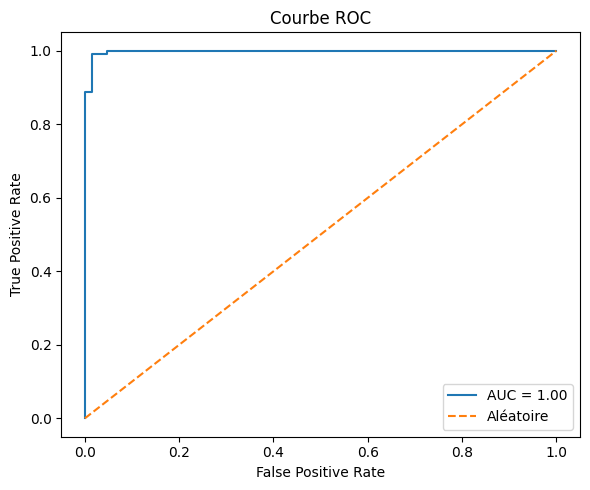

In [18]:
import matplotlib.pyplot as plt

# Calcul des points ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
auc_score = metrics.auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], linestyle='--', label='Aléatoire')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Partie de Prediction 

In [ ]:

import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import StandardScaler

# —————— Création dynamique des sliders pour chaque feature ——————
sliders = {}
for feat in X.columns:
    min_val = float(df[feat].min())
    max_val = float(df[feat].max())
    step = (max_val - min_val) / 100  # 100 pas
    sliders[feat] = widgets.FloatSlider(
        value=df[feat].mean(),
        min=min_val,
        max=max_val,
        step=step,
        description=feat,
        continuous_update=False,
        layout=widgets.Layout(width='600px')
    )

# Bouton et zone de sortie
predict_button = widgets.Button(description="Prédire (Logistic Regression)", button_style='success')
output = widgets.Output()

# Fonction de prédiction
@output.capture(clear_output=True)
def on_predict_clicked(b):
    # Récupérer les valeurs depuis les sliders
    sample = [slider.value for slider in sliders.values()]
    # Normalisation et prédiction
    sample_scaled = scaler.transform([sample])
    pred = model.predict(sample_scaled)[0]
    proba = model.predict_proba(sample_scaled)[0, pred]
    label = 'Maligne' if pred == 1 else 'Bénigne'
    print(f"Espèce prédite : {label}")
    print(f"Probabilité associée : {proba:.2%}")

# Liaison et affichage
predict_button.on_click(on_predict_clicked)
ui_items = [sl for sl in sliders.values()] + [predict_button, output]
display(widgets.VBox(ui_items))